In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Get the current working directory (where your notebook is)
base_dir = os.path.dirname(os.getcwd())

# Load the datasets from the 'data/raw' folder
linear_file_path = os.path.join(base_dir, 'data', 'raw', 'linear_data_raw.csv')
logistic_file_path = os.path.join(base_dir, 'data', 'raw', 'logistic_data_raw.csv')

linear_df = pd.read_csv(linear_file_path)
logistic_df = pd.read_csv(logistic_file_path)

print("Linear Data:")
print(linear_df.head())
print("\nLogistic Data:")
print(logistic_df.head())

Linear Data:
   Time_of_Day  Temperature_Celsius
0          8.0                26.96
1          8.2                27.18
2          8.4                26.45
3          8.6                27.27
4          8.8                28.23

Logistic Data:
   Hours_Studied  Exam_Result
0            1.6            0
1            5.6            1
2            9.3            1
3            5.1            1
4            7.5            1


#Cell 2: Linear Regression

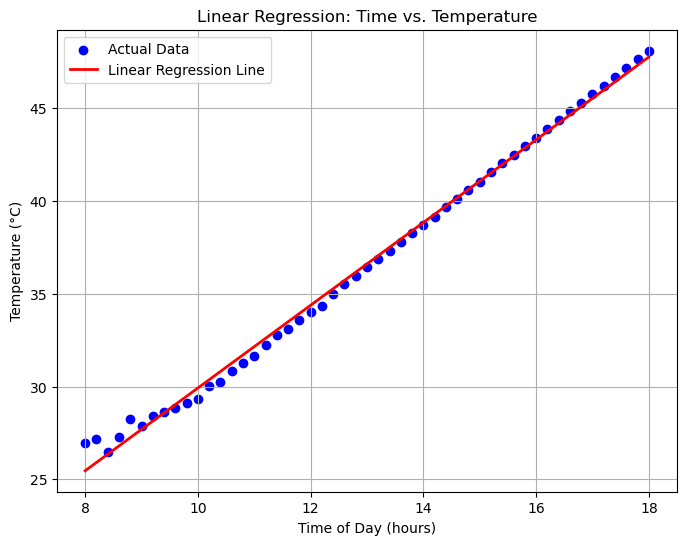

Linear Regression Equation: y = 7.64 + 2.23x


In [ ]:
# Prepare the data
X_lin = linear_df[['Time_of_Day']]
y_lin = linear_df['Temperature_Celsius']

# Train the model
model_lin = LinearRegression()
model_lin.fit(X_lin, y_lin)

# Make predictions for plotting the line
y_lin_pred = model_lin.predict(X_lin)
-

print(f"Linear Regression Equation: y = {model_lin.intercept_:.2f} + {model_lin.coef_[0]:.2f}x")